# COVID19DB PROJECT (www.covid19db.org): covid19 - Administrative division


This notebook demonstrates how to access Administrative division data.

# Administrative division, level 0 - List of countries

Data source for administratime division: https://gadm.org/


In [1]:
import psycopg2
import pandas as pd
from pandas.plotting import register_matplotlib_converters 
register_matplotlib_converters()
import matplotlib.pyplot as plt

# Connect to covid19db.org
conn = psycopg2.connect(
    host='covid19db.org',
    port=5432,
    dbname='covid19',
    user='covid19',
    password='covid19'
)

cur = conn.cursor()

In [2]:
import geopandas as gpd
def get_administrative_division(level=0, countrycode=None):
    sql = f"SELECT * FROM administrative_division WHERE adm_level={level} "
    if level>0 and countrycode: 
        sql = sql +  f"AND countrycode='{countrycode}'"

    admin_data = gpd.GeoDataFrame.from_postgis(sql, conn, geom_col='geometry')
    admin_data["area"] = admin_data['geometry'].area
    return admin_data

In [87]:
import geoplot as gplt
import geoplot.crs as gcrs
import mapclassify as mc
import geoplot as gplt

def choropleth_administrative_division(data, hue, add_text=False):
    schema = mc.Quantiles(data[hue], k=10)
    gplt.choropleth(
        data,     
        hue=hue,     
        edgecolor='white', 
        linewidth=1,
        cmap='Blues',
        scheme=schema,
        legend=True, 
        legend_kwargs={'bbox_to_anchor': (1, 0.9), 'frameon': False},
    )
    if add_text:
        for _, row in data.iterrows():
          plt.text(s=row['adm_area_1'], x = row['longitude'], y = row['latitude'],
                   horizontalalignment='center', 
                   fontdict = {'weight': 'bold', 'size': 10, 'family': 'serif', 'color':  'maroon',})

In [88]:
admin_0_data = get_administrative_division(level=0)
admin_0_data.head()

,country,countrycode,countrycode_alpha2,adm_level,adm_area_1,adm_area_1_code,adm_area_2,adm_area_2_code,adm_area_3,adm_area_3_code,gid,latitude,longitude,properties,geometry,area
0,Algeria,DZA,DZ,0,None,None,None,None,None,None,DZA,28.158374,2.677146,"{'GID_0': 'DZA', 'NAME_0': 'Algeria'}","POLYGON ((7.78493 21.04899, 7.44568 20.84247, ...",212.728851
1,Ecuador,ECU,EC,0,None,None,None,None,None,None,ECU,-1.428014,-78.775104,"{'GID_0': 'ECU', 'NAME_0': 'Ecuador'}","MULTIPOLYGON (((-79.75092 -4.48204, -79.81512 ...",20.815056
2,Egypt,EGY,EG,0,None,None,None,None,None,None,EGY,26.569799,29.783659,"{'GID_0': 'EGY', 'NAME_0': 'Egypt'}","MULTIPOLYGON (((36.18736 23.62792, 36.21514 23...",89.247556
3,Eritrea,ERI,ER,0,None,None,None,None,None,None,ERI,15.381915,38.857271,"{'GID_0': 'ERI', 'NAME_0': 'Eritrea'}","MULTIPOLYGON (((41.88418 13.08320, 41.07730 13...",10.107395
4,Western Sahara,ESH,EH,0,None,None,None,None,None,None,ESH,24.679022,-13.134732,"{'GID_0': 'ESH', 'NAME_0': 'Western Sahara'}","POLYGON ((-16.41708 22.52931, -16.35986 22.578...",23.923251


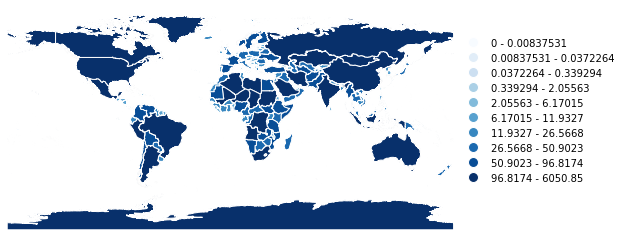

In [89]:
choropleth_administrative_division(admin_0_data, 'area', add_text=False)

# Administrative division, level 1

### Administrative division, level 1 - Poland

In [90]:
POL_admin_1_data = get_administrative_division(level=1, countrycode='POL')
POL_admin_1_data.head()

,country,countrycode,countrycode_alpha2,adm_level,adm_area_1,adm_area_1_code,adm_area_2,adm_area_2_code,adm_area_3,adm_area_3_code,gid,latitude,longitude,properties,geometry,area
0,Poland,POL,PL,1,Dolnośląskie,POL.1_1,None,None,None,None,POL.1_1,51.090451,16.411440,"{'CC_1': '02', 'GID_0': 'POL', 'GID_1': 'POL.1...","POLYGON ((15.06966 51.01997, 15.03803 51.01222...",2.554630
1,Poland,POL,PL,1,Kujawsko-Pomorskie,POL.2_1,None,None,None,None,POL.2_1,53.072704,18.488217,"{'CC_1': '04', 'GID_0': 'POL', 'GID_1': 'POL.2...","POLYGON ((18.23998 52.48726, 18.20458 52.48317...",2.411728
2,Poland,POL,PL,1,Łódzkie,POL.3_1,None,None,None,None,POL.3_1,51.604865,19.417596,"{'CC_1': '10', 'GID_0': 'POL', 'GID_1': 'POL.3...","POLYGON ((19.81074 50.90792, 19.72790 50.84328...",2.364374
3,Poland,POL,PL,1,Lubelskie,POL.4_1,None,None,None,None,POL.4_1,51.221061,22.899078,"{'CC_1': '06', 'GID_0': 'POL', 'GID_1': 'POL.4...","POLYGON ((23.40326 50.30130, 23.43580 50.34699...",3.227790
4,Poland,POL,PL,1,Lubuskie,POL.5_1,None,None,None,None,POL.5_1,52.196173,15.342746,"{'CC_1': '08', 'GID_0': 'POL', 'GID_1': 'POL.5...","POLYGON ((15.12407 51.43452, 15.08793 51.42726...",1.838208


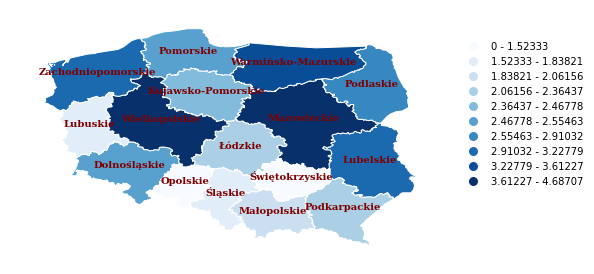

In [91]:
 choropleth_administrative_division(POL_admin_1_data, 'area', add_text=True)

In [ ]:
### Administrative division, level 2 - Poland

In [114]:
POL_admin_2_data = get_administrative_division(level=2, countrycode='POL')
POL_admin_2_data.head()

,country,countrycode,countrycode_alpha2,adm_level,adm_area_1,adm_area_1_code,adm_area_2,adm_area_2_code,adm_area_3,adm_area_3_code,gid,latitude,longitude,properties,geometry,area
0,Poland,POL,PL,2,Dolnośląskie,POL.1_1,Bolesławiec,POL.1.1_1,None,None,POL.1.1_1,51.337002,15.537063,"{'CC_2': '0201', 'GID_0': 'POL', 'GID_1': 'POL...","POLYGON ((15.42833 51.12017, 15.43050 51.14892...",0.168945
1,Poland,POL,PL,2,Dolnośląskie,POL.1_1,Dzierżoniów,POL.1.2_1,None,None,POL.1.2_1,50.737003,16.701499,"{'CC_2': '0202', 'GID_0': 'POL', 'GID_1': 'POL...","POLYGON ((16.55341 50.63639, 16.47958 50.68110...",0.062152
2,Poland,POL,PL,2,Dolnośląskie,POL.1_1,Głogów,POL.1.3_1,None,None,POL.1.3_1,51.675879,16.077136,"{'CC_2': '0203', 'GID_0': 'POL', 'GID_1': 'POL...","POLYGON ((16.32772 51.59841, 16.21391 51.63433...",0.057063
3,Poland,POL,PL,2,Dolnośląskie,POL.1_1,Góra,POL.1.4_1,None,None,POL.1.4_1,51.631333,16.554241,"{'CC_2': '0204', 'GID_0': 'POL', 'GID_1': 'POL...","POLYGON ((16.46727 51.50152, 16.48221 51.51674...",0.097169
4,Poland,POL,PL,2,Dolnośląskie,POL.1_1,Jawor,POL.1.5_1,None,None,POL.1.5_1,51.019336,16.154344,"{'CC_2': '0205', 'GID_0': 'POL', 'GID_1': 'POL...","POLYGON ((16.15940 50.95069, 16.20003 50.91381...",0.075242


### Administrative division, level 1 - USA

In [92]:
USA_admin_1_data = get_administrative_division(level=1, countrycode='USA')
USA_admin_1_data.head()
# Remove Alaska and Hawai
USA_admin_1_data.drop(USA_admin_1_data[USA_admin_1_data.adm_area_1.isin(['Hawaii', 'Alaska'])].index, inplace=True)
USA_admin_1_data.head()

,country,countrycode,countrycode_alpha2,adm_level,adm_area_1,adm_area_1_code,adm_area_2,adm_area_2_code,adm_area_3,adm_area_3_code,gid,latitude,longitude,properties,geometry,area
0,United States,USA,US,1,Alabama,USA.1_1,None,None,None,None,USA.1_1,32.793242,-86.827967,"{'CC_1': None, 'GID_0': 'USA', 'GID_1': 'USA.1...","MULTIPOLYGON (((-88.39941 30.39500, -88.47203 ...",12.847139
2,United States,USA,US,1,Arizona,USA.3_1,None,None,None,None,USA.3_1,34.293741,-111.664054,"{'CC_1': None, 'GID_0': 'USA', 'GID_1': 'USA.3...","POLYGON ((-110.82376 31.33125, -111.07281 31.3...",28.935595
3,United States,USA,US,1,Arkansas,USA.4_1,None,None,None,None,USA.4_1,34.899163,-92.439509,"{'CC_1': None, 'GID_0': 'USA', 'GID_1': 'USA.4...","POLYGON ((-92.72461 33.01474, -94.04562 33.020...",13.574344
4,United States,USA,US,1,California,USA.5_1,None,None,None,None,USA.5_1,37.245012,-119.607635,"{'CC_1': None, 'GID_0': 'USA', 'GID_1': 'USA.5...","MULTIPOLYGON (((-124.23612 40.75431, -124.2287...",41.661558
5,United States,USA,US,1,Colorado,USA.6_1,None,None,None,None,USA.6_1,38.999048,-105.547805,"{'CC_1': None, 'GID_0': 'USA', 'GID_1': 'USA.6...","POLYGON ((-102.04304 37.64289, -102.04227 36.9...",28.059294


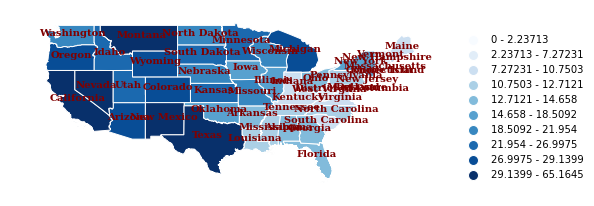

In [93]:
choropleth_administrative_division(USA_admin_1_data, 'area', add_text=True)

### Administrative division, level 2 - USA

In [94]:
USA_admin_2_data = get_administrative_division(level=2, countrycode='USA')
# Remove Alaska and Hawai
USA_admin_2_data.drop(USA_admin_2_data[USA_admin_2_data.adm_area_1.isin(['Hawaii', 'Alaska'])].index, inplace=True)
USA_admin_2_data.head()

,country,countrycode,countrycode_alpha2,adm_level,adm_area_1,adm_area_1_code,adm_area_2,adm_area_2_code,adm_area_3,adm_area_3_code,gid,latitude,longitude,properties,geometry,area
0,United States,USA,US,2,Alabama,USA.1_1,Autauga,USA.1.1_1,None,None,USA.1.1_1,32.535523,-86.642910,"{'CC_2': None, 'GID_0': 'USA', 'GID_1': 'USA.1...","POLYGON ((-86.81896 32.34027, -86.81035 32.358...",0.150487
1,United States,USA,US,2,Alabama,USA.1_1,Baldwin,USA.1.2_1,None,None,USA.1.2_1,30.736267,-87.724924,"{'CC_2': None, 'GID_0': 'USA', 'GID_1': 'USA.1...","MULTIPOLYGON (((-88.02036 30.76087, -88.01750 ...",0.399447
2,United States,USA,US,2,Alabama,USA.1_1,Barbour,USA.1.3_1,None,None,USA.1.3_1,31.869798,-85.395443,"{'CC_2': None, 'GID_0': 'USA', 'GID_1': 'USA.1...","POLYGON ((-85.13026 31.76386, -85.15755 31.774...",0.222083
3,United States,USA,US,2,Alabama,USA.1_1,Bibb,USA.1.4_1,None,None,USA.1.4_1,32.998646,-87.126384,"{'CC_2': None, 'GID_0': 'USA', 'GID_1': 'USA.1...","POLYGON ((-87.42078 32.87446, -87.42175 33.004...",0.157068
4,United States,USA,US,2,Alabama,USA.1_1,Blount,USA.1.5_1,None,None,USA.1.5_1,33.981583,-86.567974,"{'CC_2': None, 'GID_0': 'USA', 'GID_1': 'USA.1...","POLYGON ((-86.95322 33.81542, -86.96453 33.866...",0.165697


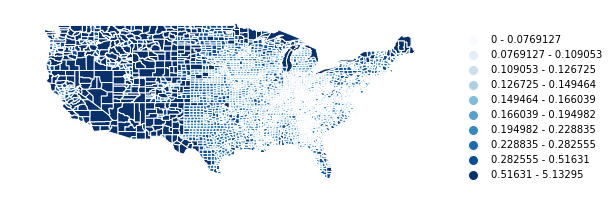

In [96]:
choropleth_administrative_division(USA_admin_2_data, 'area', add_text=False)

### Administrative division, level 1 - UK

In [97]:
GBR_admin_1_data = get_administrative_division(level=1, countrycode='GBR')
GBR_admin_1_data.head()

,country,countrycode,countrycode_alpha2,adm_level,adm_area_1,adm_area_1_code,adm_area_2,adm_area_2_code,adm_area_3,adm_area_3_code,gid,latitude,longitude,properties,geometry,area
0,United Kingdom,GBR,GB,1,England,GBR.1_1,None,None,None,None,GBR.1_1,52.589902,-1.461575,"{'CC_1': None, 'GID_0': 'GBR', 'GID_1': 'GBR.1...","MULTIPOLYGON (((-4.63632 50.35447, -4.63361 50...",17.355468
1,United Kingdom,GBR,GB,1,Northern Ireland,GBR.2_1,None,None,None,None,GBR.2_1,54.612021,-6.691186,"{'CC_1': None, 'GID_0': 'GBR', 'GID_1': 'GBR.2...","MULTIPOLYGON (((-8.15136 54.45805, -8.17157 54...",1.960249
2,United Kingdom,GBR,GB,1,Scotland,GBR.3_1,None,None,None,None,GBR.3_1,56.851225,-4.180949,"{'CC_1': None, 'GID_0': 'GBR', 'GID_1': 'GBR.3...","MULTIPOLYGON (((-0.75990 60.42760, -0.73177 60...",11.682870
3,United Kingdom,GBR,GB,1,Wales,GBR.4_1,None,None,None,None,GBR.4_1,52.335229,-3.763468,"{'CC_1': None, 'GID_0': 'GBR', 'GID_1': 'GBR.4...","MULTIPOLYGON (((-4.91848 51.69910, -4.89802 51...",2.759039


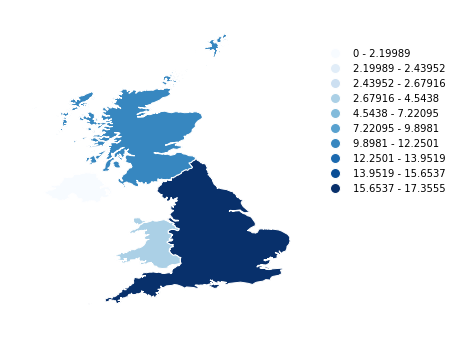

In [98]:
choropleth_administrative_division(GBR_admin_1_data, 'area', add_text=False)

### Administrative division, level 2 - UK

In [99]:
GBR_admin_2_data = get_administrative_division(level=2, countrycode='GBR')
GBR_admin_2_data.head()

,country,countrycode,countrycode_alpha2,adm_level,adm_area_1,adm_area_1_code,adm_area_2,adm_area_2_code,adm_area_3,adm_area_3_code,gid,latitude,longitude,properties,geometry,area
0,United Kingdom,GBR,GB,2,England,GBR.1_1,Barnsley,GBR.1.1_1,None,None,GBR.1.1_1,53.526238,-1.533560,"{'CC_2': None, 'GID_0': 'GBR', 'GID_1': 'GBR.1...","POLYGON ((-1.78997 53.47293, -1.81611 53.51611...",0.048030
1,United Kingdom,GBR,GB,2,England,GBR.1_1,Bath and North East Somerset,GBR.1.2_1,None,None,GBR.1.2_1,51.355271,-2.469959,"{'CC_2': None, 'GID_0': 'GBR', 'GID_1': 'GBR.1...","POLYGON ((-2.68629 51.31516, -2.68066 51.32836...",0.045713
2,United Kingdom,GBR,GB,2,England,GBR.1_1,Bedfordshire,GBR.1.3_1,None,None,GBR.1.3_1,52.195932,-0.489157,"{'CC_2': None, 'GID_0': 'GBR', 'GID_1': 'GBR.1...","POLYGON ((-0.58508 52.11364, -0.63161 52.14651...",0.049786
3,United Kingdom,GBR,GB,2,England,GBR.1_1,Birmingham,GBR.1.4_1,None,None,GBR.1.4_1,52.484500,-1.864205,"{'CC_2': None, 'GID_0': 'GBR', 'GID_1': 'GBR.1...","POLYGON ((-1.73417 52.51014, -1.78616 52.49877...",0.034777
4,United Kingdom,GBR,GB,2,England,GBR.1_1,Blackburn with Darwen,GBR.1.5_1,None,None,GBR.1.5_1,53.695140,-2.469856,"{'CC_2': None, 'GID_0': 'GBR', 'GID_1': 'GBR.1...","POLYGON ((-2.51111 53.63377, -2.52649 53.65359...",0.018927


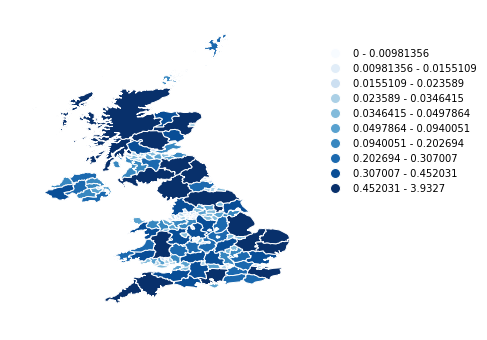

In [100]:
choropleth_administrative_division(GBR_admin_2_data, 'area', add_text=False)

### Administrative division, level 3 - UK

In [101]:
GBR_admin_3_data = get_administrative_division(level=3, countrycode='GBR')
GBR_admin_3_data.head()

,country,countrycode,countrycode_alpha2,adm_level,adm_area_1,adm_area_1_code,adm_area_2,adm_area_2_code,adm_area_3,adm_area_3_code,gid,latitude,longitude,properties,geometry,area
0,United Kingdom,GBR,GB,3,England,GBR.1_1,Barnsley,GBR.1.1_1,Barnsley,GBR.1.1.1_1,GBR.1.1.1_1,53.526238,-1.533560,"{'CC_3': None, 'GID_0': 'GBR', 'GID_1': 'GBR.1...","POLYGON ((-1.78997 53.47293, -1.80667 53.53194...",0.050613
1,United Kingdom,GBR,GB,3,England,GBR.1_1,Bath and North East Somerset,GBR.1.2_1,Bath and North East Somerset,GBR.1.2.1_1,GBR.1.2.1_1,51.355271,-2.469959,"{'CC_3': None, 'GID_0': 'GBR', 'GID_1': 'GBR.1...","POLYGON ((-2.68629 51.31516, -2.67996 51.37900...",0.045493
2,United Kingdom,GBR,GB,3,England,GBR.1_1,Bedfordshire,GBR.1.3_1,Bedford,GBR.1.3.1_1,GBR.1.3.1_1,52.195932,-0.489157,"{'CC_3': None, 'GID_0': 'GBR', 'GID_1': 'GBR.1...","POLYGON ((-0.58508 52.11364, -0.65444 52.19250...",0.050473
3,United Kingdom,GBR,GB,3,England,GBR.1_1,Birmingham,GBR.1.4_1,Birmingham,GBR.1.4.1_1,GBR.1.4.1_1,52.484500,-1.864205,"{'CC_3': None, 'GID_0': 'GBR', 'GID_1': 'GBR.1...","POLYGON ((-1.73417 52.51014, -1.78616 52.49877...",0.034718
4,United Kingdom,GBR,GB,3,England,GBR.1_1,Blackburn with Darwen,GBR.1.5_1,Blackburn with Darwen,GBR.1.5.1_1,GBR.1.5.1_1,53.695140,-2.469856,"{'CC_3': None, 'GID_0': 'GBR', 'GID_1': 'GBR.1...","POLYGON ((-2.51111 53.63377, -2.56430 53.76089...",0.019192


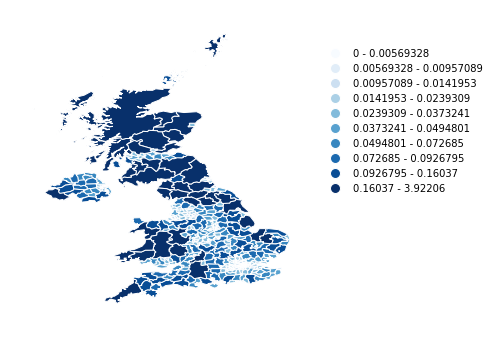

In [102]:
choropleth_administrative_division(GBR_admin_3_data, 'area', add_text=False)

### Administrative division, level 1 - Italy

In [103]:
ITA_admin_1_data = get_administrative_division(level=1, countrycode='ITA')
ITA_admin_1_data.head()

,country,countrycode,countrycode_alpha2,adm_level,adm_area_1,adm_area_1_code,adm_area_2,adm_area_2_code,adm_area_3,adm_area_3_code,gid,latitude,longitude,properties,geometry,area
0,Italy,ITA,IT,1,Abruzzo,ITA.1_1,None,None,None,None,ITA.1_1,42.228034,13.855137,"{'CC_1': '13', 'GID_0': 'ITA', 'GID_1': 'ITA.1...","POLYGON ((14.53183 41.80166, 14.49043 41.76194...",1.177311
1,Italy,ITA,IT,1,Apulia,ITA.2_1,None,None,None,None,ITA.2_1,40.984799,16.620338,"{'CC_1': '16', 'GID_0': 'ITA', 'GID_1': 'ITA.2...","MULTIPOLYGON (((18.36986 39.79458, 18.34514 39...",2.073274
2,Italy,ITA,IT,1,Basilicata,ITA.3_1,None,None,None,None,ITA.3_1,40.500675,16.082277,"{'CC_1': '17', 'GID_0': 'ITA', 'GID_1': 'ITA.3...","POLYGON ((15.78796 39.96917, 15.75597 39.92421...",1.062724
3,Italy,ITA,IT,1,Calabria,ITA.4_1,None,None,None,None,ITA.4_1,39.068132,16.347359,"{'CC_1': '18', 'GID_0': 'ITA', 'GID_1': 'ITA.4...","POLYGON ((17.17014 38.99958, 17.15986 38.97931...",1.574504
4,Italy,ITA,IT,1,Campania,ITA.5_1,None,None,None,None,ITA.5_1,40.859986,14.840554,"{'CC_1': '15', 'GID_0': 'ITA', 'GID_1': 'ITA.5...","MULTIPOLYGON (((15.67699 40.05590, 15.64458 40...",1.458375


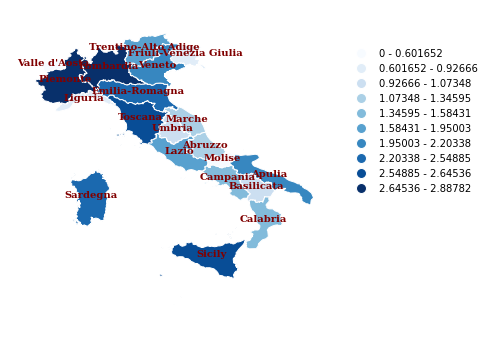

In [104]:
choropleth_administrative_division(ITA_admin_1_data, 'area', add_text=True)

### Administrative division, level 2 - Italy

In [105]:
ITA_admin_2_data = get_administrative_division(level=2, countrycode='ITA')
ITA_admin_2_data.head()

,country,countrycode,countrycode_alpha2,adm_level,adm_area_1,adm_area_1_code,adm_area_2,adm_area_2_code,adm_area_3,adm_area_3_code,gid,latitude,longitude,properties,geometry,area
0,Italy,ITA,IT,2,Abruzzo,ITA.1_1,Chieti,ITA.1.1_1,None,None,ITA.1.1_1,42.101086,14.382700,"{'CC_2': '69', 'GID_0': 'ITA', 'GID_1': 'ITA.1...","POLYGON ((14.25307 41.88950, 14.23061 41.87806...",0.280637
1,Italy,ITA,IT,2,Abruzzo,ITA.1_1,L'Aquila,ITA.1.2_1,None,None,ITA.1.2_1,42.104988,13.603098,"{'CC_2': '66', 'GID_0': 'ITA', 'GID_1': 'ITA.1...","POLYGON ((13.32633 41.94295, 13.10589 42.02698...",0.548829
2,Italy,ITA,IT,2,Abruzzo,ITA.1_1,Pescara,ITA.1.3_1,None,None,ITA.1.3_1,42.332625,13.984460,"{'CC_2': '68', 'GID_0': 'ITA', 'GID_1': 'ITA.1...","POLYGON ((13.80144 42.19025, 13.81166 42.19769...",0.133982
3,Italy,ITA,IT,2,Abruzzo,ITA.1_1,Teramo,ITA.1.4_1,None,None,ITA.1.4_1,42.645867,13.726467,"{'CC_2': '67', 'GID_0': 'ITA', 'GID_1': 'ITA.1...","POLYGON ((14.09514 42.57933, 14.14569 42.53097...",0.213546
4,Italy,ITA,IT,2,Apulia,ITA.2_1,Bari,ITA.2.1_1,None,None,ITA.2.1_1,40.931762,16.752000,"{'CC_2': '72', 'GID_0': 'ITA', 'GID_1': 'ITA.2...","POLYGON ((17.31097 40.81190, 17.40026 40.78624...",0.407923


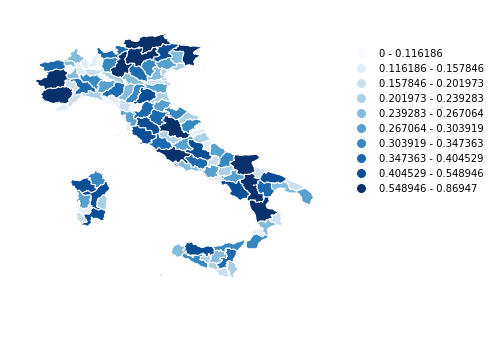

In [106]:
choropleth_administrative_division(ITA_admin_2_data, 'area', add_text=False)

### Administrative division, level 1 - France

In [107]:
FRA_admin_1_data = get_administrative_division(level=1, countrycode='FRA')
FRA_admin_1_data.head()

,country,countrycode,countrycode_alpha2,adm_level,adm_area_1,adm_area_1_code,adm_area_2,adm_area_2_code,adm_area_3,adm_area_3_code,gid,latitude,longitude,properties,geometry,area
0,France,FRA,FR,1,Auvergne-Rhône-Alpes,FRA.1_1,None,None,None,None,FRA.1_1,45.517934,4.545294,"{'CC_1': None, 'GID_0': 'FRA', 'GID_1': 'FRA.1...","POLYGON ((2.22057 44.62204, 2.20748 44.61553, ...",8.201932
1,France,FRA,FR,1,Bourgogne-Franche-Comté,FRA.2_1,None,None,None,None,FRA.2_1,47.234197,4.806917,"{'CC_1': None, 'GID_0': 'FRA', 'GID_1': 'FRA.2...","POLYGON ((5.89463 46.28661, 5.85066 46.26170, ...",5.709417
2,France,FRA,FR,1,Bretagne,FRA.3_1,None,None,None,None,FRA.3_1,48.179023,-2.845107,"{'CC_1': None, 'GID_0': 'FRA', 'GID_1': 'FRA.3...","MULTIPOLYGON (((-4.61016 48.57532, -4.59847 48...",3.340533
3,France,FRA,FR,1,Centre-Val de Loire,FRA.4_1,None,None,None,None,FRA.4_1,47.484760,1.684386,"{'CC_1': None, 'GID_0': 'FRA', 'GID_1': 'FRA.4...","POLYGON ((1.12372 46.52232, 1.09009 46.53758, ...",4.719857
4,France,FRA,FR,1,Corse,FRA.5_1,None,None,None,None,FRA.5_1,42.151475,9.105593,"{'CC_1': None, 'GID_0': 'FRA', 'GID_1': 'FRA.5...","MULTIPOLYGON (((9.21958 41.41319, 9.26486 41.4...",0.951916


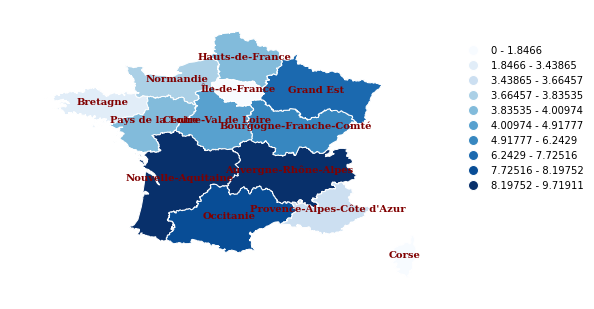

In [109]:
choropleth_administrative_division(FRA_admin_1_data, 'area', add_text=True)

### Administrative division, level 2 - France

In [110]:
FRA_admin_2_data = get_administrative_division(level=2, countrycode='FRA')
FRA_admin_2_data.head()

,country,countrycode,countrycode_alpha2,adm_level,adm_area_1,adm_area_1_code,adm_area_2,adm_area_2_code,adm_area_3,adm_area_3_code,gid,latitude,longitude,properties,geometry,area
0,France,FRA,FR,2,Auvergne-Rhône-Alpes,FRA.1_1,Ain,FRA.1.1_1,None,None,FRA.1.1_1,46.099670,5.348551,"{'CC_2': '01', 'GID_0': 'FRA', 'GID_1': 'FRA.1...","POLYGON ((5.25563 45.78431, 5.19102 45.77195, ...",0.672834
1,France,FRA,FR,2,Auvergne-Rhône-Alpes,FRA.1_1,Allier,FRA.1.2_1,None,None,FRA.1.2_1,46.393568,3.187775,"{'CC_2': '03', 'GID_0': 'FRA', 'GID_1': 'FRA.1...","POLYGON ((2.38608 46.33197, 2.36621 46.31118, ...",0.863035
2,France,FRA,FR,2,Auvergne-Rhône-Alpes,FRA.1_1,Ardèche,FRA.1.3_1,None,None,FRA.1.3_1,44.752650,4.425655,"{'CC_2': '07', 'GID_0': 'FRA', 'GID_1': 'FRA.1...","POLYGON ((4.23405 44.27506, 4.17799 44.31774, ...",0.633077
3,France,FRA,FR,2,Auvergne-Rhône-Alpes,FRA.1_1,Cantal,FRA.1.4_1,None,None,FRA.1.4_1,45.051154,2.668998,"{'CC_2': '15', 'GID_0': 'FRA', 'GID_1': 'FRA.1...","POLYGON ((2.85493 44.87431, 2.77179 44.85831, ...",0.659726
4,France,FRA,FR,2,Auvergne-Rhône-Alpes,FRA.1_1,Drôme,FRA.1.5_1,None,None,FRA.1.5_1,44.685327,5.167408,"{'CC_2': '26', 'GID_0': 'FRA', 'GID_1': 'FRA.1...","POLYGON ((4.81214 44.24206, 4.80456 44.30390, ...",0.744210


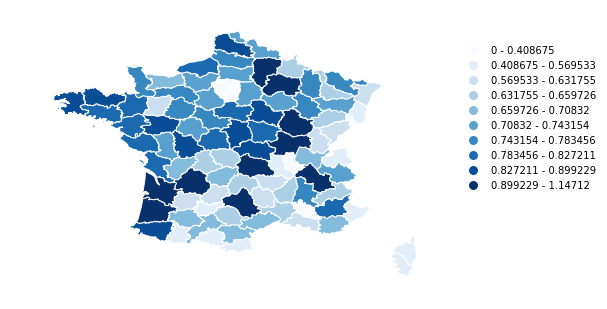

In [111]:
choropleth_administrative_division(FRA_admin_2_data, 'area', add_text=False)

### Administrative division, level 3 - France

In [112]:
FRA_admin_3_data = get_administrative_division(level=3, countrycode='FRA')
FRA_admin_3_data.head()

,country,countrycode,countrycode_alpha2,adm_level,adm_area_1,adm_area_1_code,adm_area_2,adm_area_2_code,adm_area_3,adm_area_3_code,gid,latitude,longitude,properties,geometry,area
0,France,FRA,FR,3,Auvergne-Rhône-Alpes,FRA.1_1,Ain,FRA.1.1_1,Belley,FRA.1.1.1_1,FRA.1.1.1_1,45.869288,5.557899,"{'CC_3': None, 'GID_0': 'FRA', 'GID_1': 'FRA.1...","POLYGON ((5.25563 45.78431, 5.17708 45.79339, ...",0.153930
1,France,FRA,FR,3,Auvergne-Rhône-Alpes,FRA.1_1,Ain,FRA.1.1_1,Bourg-en-Bresse,FRA.1.1.2_1,FRA.1.1.2_1,46.160439,5.091561,"{'CC_3': None, 'GID_0': 'FRA', 'GID_1': 'FRA.1...","POLYGON ((4.79174 46.16360, 4.93560 46.51423, ...",0.363677
2,France,FRA,FR,3,Auvergne-Rhône-Alpes,FRA.1_1,Ain,FRA.1.1_1,Gex,FRA.1.1.3_1,FRA.1.1.3_1,46.260764,5.981425,"{'CC_3': None, 'GID_0': 'FRA', 'GID_1': 'FRA.1...","POLYGON ((5.89303 46.11892, 5.88999 46.08715, ...",0.050573
3,France,FRA,FR,3,Auvergne-Rhône-Alpes,FRA.1_1,Ain,FRA.1.1_1,Nantua,FRA.1.1.4_1,FRA.1.1.4_1,46.145240,5.629112,"{'CC_3': None, 'GID_0': 'FRA', 'GID_1': 'FRA.1...","POLYGON ((5.40437 46.00782, 5.33483 46.03805, ...",0.109467
4,France,FRA,FR,3,Auvergne-Rhône-Alpes,FRA.1_1,Allier,FRA.1.2_1,Montluçon,FRA.1.2.1_1,FRA.1.2.1_1,46.398294,2.705602,"{'CC_3': None, 'GID_0': 'FRA', 'GID_1': 'FRA.1...","POLYGON ((2.38608 46.33197, 2.36621 46.31118, ...",0.270621


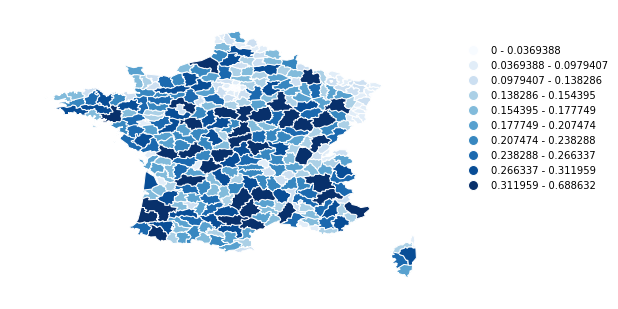

In [113]:
choropleth_administrative_division(FRA_admin_3_data, 'area', add_text=False)